In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw

# Пороговая обработка Оцу на выделенном фрагменте фотографии

Если объект отличается по яркости от фона, то можно ввести порог, чтобы разделить изображение на светлый объект и темный фон.
Метод Оцу для расчета порога использует гистограмму изображения. Гистограмма показывает, как часто встречается на данном изображении то или иное значение пикселя.

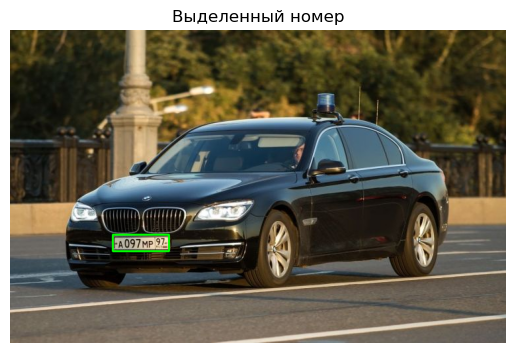

In [2]:
img = cv2.imread('images/bmw.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image = cv2.rectangle(img, (155, 310), (240, 335), (0, 255, 0), 2)
plt.axis('off')
plt.title('Выделенный номер')
plt.imshow(image);

Сначала возьмём сам фрагмент

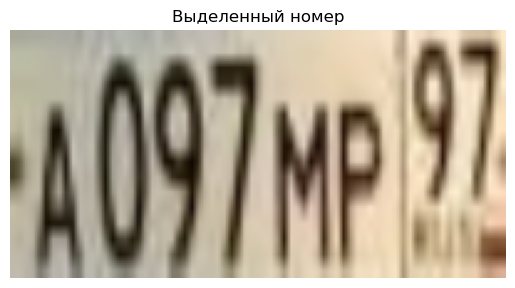

In [3]:
crop = img[315:331, 160:235]
piece = cv2.resize(
    crop, 
    (200, 100), 
    interpolation=cv2.INTER_LINEAR
)

cv2.imwrite ('images/o001oo.png', piece)

plt.axis('off')
plt.title('Выделенный номер')
plt.imshow(piece);

Для эксперимента можно зашумить выделенный фрагмент и применить к этому изображению обработку Оцу на прямую и применить фильтр Гаусса + обработку Оцу

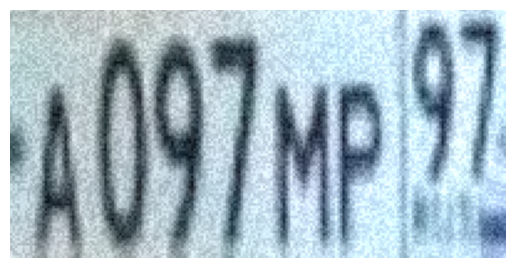

In [4]:
image = Image.open('images/o001oo.png')
draw = ImageDraw.Draw(image)

width = image.size[0]
height = image.size[1]
pix = image.load()

for i in range(width):
    for j in range(height):
        rand = random.randint(0, 50)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

image.save("images/numb_med.png", "JPEG")

plt.imshow(image);
plt.axis('off')
plt.show();

Применим к зашумленному изображению обработку Оцу напямую и обработку Оцу на изображении с фильтром Гаусса

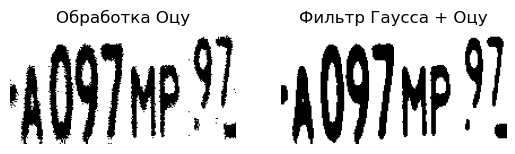

In [5]:
img = cv2.imread('images/numb_med.png', 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)


ret, th = cv2.threshold(
    img,
    0,
    255,
    cv2.THRESH_BINARY+cv2.THRESH_OTSU
)
plt.subplot(121), 
plt.imshow(th, 'gray'), 
plt.title('Обработка Оцу')
plt.axis("off")

ret2, th2 = cv2.threshold(
    blur,
    0,
    255,
    cv2.THRESH_BINARY+cv2.THRESH_OTSU
)
plt.subplot(122), 
plt.imshow(th2, 'gray'), 
plt.title('Фильтр Гаусса + Оцу')
plt.axis("off")

plt.show();

Как видно из результата, предварительное снижение шумов улучшает выходное изображение